# Proyek Analisis Data: Air Quality Dataset
- Nama: Dirzy Adam
- Email: dirzy.adam@gmail.com
- Id Dicoding: Dirzy Adam

## Menentukan Pertanyaan Bisnis

- Bagaimana pola konsentrasi polutan (PM2.5, PM10, SO2, NO2, CO, O3) sepanjang tahun?
- Apakah ada korelasi antara suhu (TEMP), tekanan (PRES), titik embun (DEWP), dan hujan (RAIN) dengan konsentrasi polutan?

## Menyaipkan semua library yang dibuthkan

In [1]:
import gdown
import pandas as pd
import zipfile
import os
import matplotlib.pyplot as plt
import seaborn as sns


## Data Wrangling

### Gathering Data

* Mendownload Dataset dan Mengekstrak File Zip

In [2]:
# URL untuk file dataset di Google Drive
url = 'https://drive.google.com/uc?id=1RhU3gJlkteaAQfyn9XOVAz7a5o1-etgr'

# Output file path
output = 'Air-quality-dataset.zip'

# Unduh file
gdown.download(url, output, quiet=False)

# Ekstrak file zip
with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall()

# Direktori tempat file CSV disimpan
dir_name = 'PRSA_Data_20130301-20170228'

Downloading...
From: https://drive.google.com/uc?id=1RhU3gJlkteaAQfyn9XOVAz7a5o1-etgr
To: /content/Air-quality-dataset.zip
100%|██████████| 7.96M/7.96M [00:00<00:00, 25.3MB/s]


* Baca dataset menggunakan pandas dan simpan dalam DataFrame.

In [3]:
# Muat semua file CSV dalam direktori ke dalam DataFrame
dfs = []
for filename in os.listdir(dir_name):
    if filename.endswith('.csv'):
        df = pd.read_csv(os.path.join(dir_name, filename))
        dfs.append(df)

# Gabungkan semua DataFrame
df = pd.concat(dfs, ignore_index=True)

# Tampilkan 5 baris pertama dari DataFrame
print(df.head())

   No  year  month  day  hour  PM2.5  PM10  SO2  NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0  3.0  NaN  200.0  82.0  -2.3   
1   2  2013      3    1     1    7.0   7.0  3.0  NaN  200.0  80.0  -2.5   
2   3  2013      3    1     2    5.0   5.0  3.0  2.0  200.0  79.0  -3.0   
3   4  2013      3    1     3    6.0   6.0  3.0  NaN  200.0  79.0  -3.6   
4   5  2013      3    1     4    5.0   5.0  3.0  NaN  200.0  81.0  -3.5   

     PRES  DEWP  RAIN   wd  WSPM   station  
0  1020.8 -19.7   0.0    E   0.5  Dingling  
1  1021.3 -19.0   0.0  ENE   0.7  Dingling  
2  1021.3 -19.9   0.0  ENE   0.2  Dingling  
3  1021.8 -19.1   0.0  NNE   1.0  Dingling  
4  1022.3 -19.4   0.0    N   2.1  Dingling  


### Assessing Data

In [4]:
# Melihat tipe data
print("Tipe Data:")
print(df.dtypes)
print("\n")

# Melihat statistik deskriptif
print("Statistik Deskriptif:")
print(df.describe())
print("\n")

# Memeriksa nilai yang hilang
print("Nilai yang Hilang:")
print(df.isnull().sum())
print("\n")

# Memeriksa nilai duplikat
print("Nilai Duplikat:")
print(df.duplicated().sum())


Tipe Data:
No           int64
year         int64
month        int64
day          int64
hour         int64
PM2.5      float64
PM10       float64
SO2        float64
NO2        float64
CO         float64
O3         float64
TEMP       float64
PRES       float64
DEWP       float64
RAIN       float64
wd          object
WSPM       float64
station     object
dtype: object


Statistik Deskriptif:
                  No           year          month            day  \
count  420768.000000  420768.000000  420768.000000  420768.000000   
mean    17532.500000    2014.662560       6.522930      15.729637   
std     10122.116943       1.177198       3.448707       8.800102   
min         1.000000    2013.000000       1.000000       1.000000   
25%      8766.750000    2014.000000       4.000000       8.000000   
50%     17532.500000    2015.000000       7.000000      16.000000   
75%     26298.250000    2016.000000      10.000000      23.000000   
max     35064.000000    2017.000000      12.000000      3

### Cleaning Data

In [5]:
# Mengisi nilai yang hilang
# Untuk kolom numerik, kita bisa mengisi nilai yang hilang dengan median
for col in df.columns:
    if df[col].dtype == 'float64':
        df[col].fillna(df[col].median(), inplace=True)

# Untuk kolom kategorikal seperti 'wd', kita bisa mengisi nilai yang hilang dengan modus (nilai yang paling sering muncul)
df['wd'].fillna(df['wd'].mode()[0], inplace=True)

# Memeriksa kembali nilai yang hilang
print("Nilai yang Hilang Setelah Imputasi:")
print(df.isnull().sum())


Nilai yang Hilang Setelah Imputasi:
No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64


## Exploratory Data Analysis (EDA)

### Explore


1. **Bagaimana pola konsentrasi polutan (PM2.5, PM10, SO2, NO2, CO, O3) sepanjang tahun?** Pertanyaan ini bertujuan untuk memahami bagaimana konsentrasi polutan berubah sepanjang tahun. Apakah ada bulan-bulan tertentu di mana konsentrasi polutan cenderung lebih tinggi atau lebih rendah?

2. **Apakah ada korelasi antara suhu (TEMP), tekanan (PRES), titik embun (DEWP), dan hujan (RAIN) dengan konsentrasi polutan?** Pertanyaan ini bertujuan untuk memahami hubungan antara kondisi cuaca dan kualitas udara. Misalnya, apakah suhu yang lebih tinggi atau hujan berhubungan dengan konsentrasi polutan yang lebih rendah?

In [6]:
# 1. Bagaimana pola konsentrasi polutan (PM2.5, PM10, SO2, NO2, CO, O3) sepanjang tahun?

# Buat kolom 'date' dengan menggabungkan 'year' dan 'month'
df['date'] = pd.to_datetime(df[['year', 'month']].assign(day=1))

# Hitung rata-rata bulanan untuk setiap polutan
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
monthly_averages = df.groupby(['date'])[pollutants].mean().reset_index()

# Tampilkan 5 baris pertama dari DataFrame baru
print(monthly_averages.head())


        date       PM2.5        PM10        SO2        NO2           CO  \
0 2013-03-01  104.625672  128.717686  38.285982  67.313491  1420.110215   
1 2013-04-01   62.086227   95.828819  20.614506  46.175328   902.883218   
2 2013-05-01   80.890009  129.808356  24.939006  50.222684   983.023746   
3 2013-06-01  101.236053  115.835012  13.625159  48.160256  1332.907755   
4 2013-07-01   67.381608   76.558244   7.410275  39.613153   932.234991   

          O3  
0  56.387590  
1  61.348644  
2  83.671420  
3  74.453136  
4  78.634546  


In [7]:
# 2. Apakah ada korelasi antara suhu (TEMP), tekanan (PRES), titik embun (DEWP), dan hujan (RAIN) dengan konsentrasi polutan?

# Daftar kolom yang berisi variabel cuaca dan polutan
weather_vars = ['TEMP', 'PRES', 'DEWP', 'RAIN']
pollutant_vars = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

# Hitung korelasi antara variabel cuaca dan polutan
correlations = df[weather_vars + pollutant_vars].corr()

# Tampilkan korelasi antara variabel cuaca dan polutan
print(correlations.loc[weather_vars, pollutant_vars])


         PM2.5      PM10       SO2       NO2        CO        O3
TEMP -0.130825 -0.095674 -0.318509 -0.273557 -0.318067  0.585811
PRES  0.019235 -0.017542  0.220741  0.171171  0.184148 -0.439053
DEWP  0.112726  0.069735 -0.264385 -0.030747 -0.056701  0.307427
RAIN -0.014315 -0.026355 -0.039852 -0.043241 -0.012842  0.023322


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola konsentrasi polutan (PM2.5, PM10, SO2, NO2, CO, O3) sepanjang tahun?

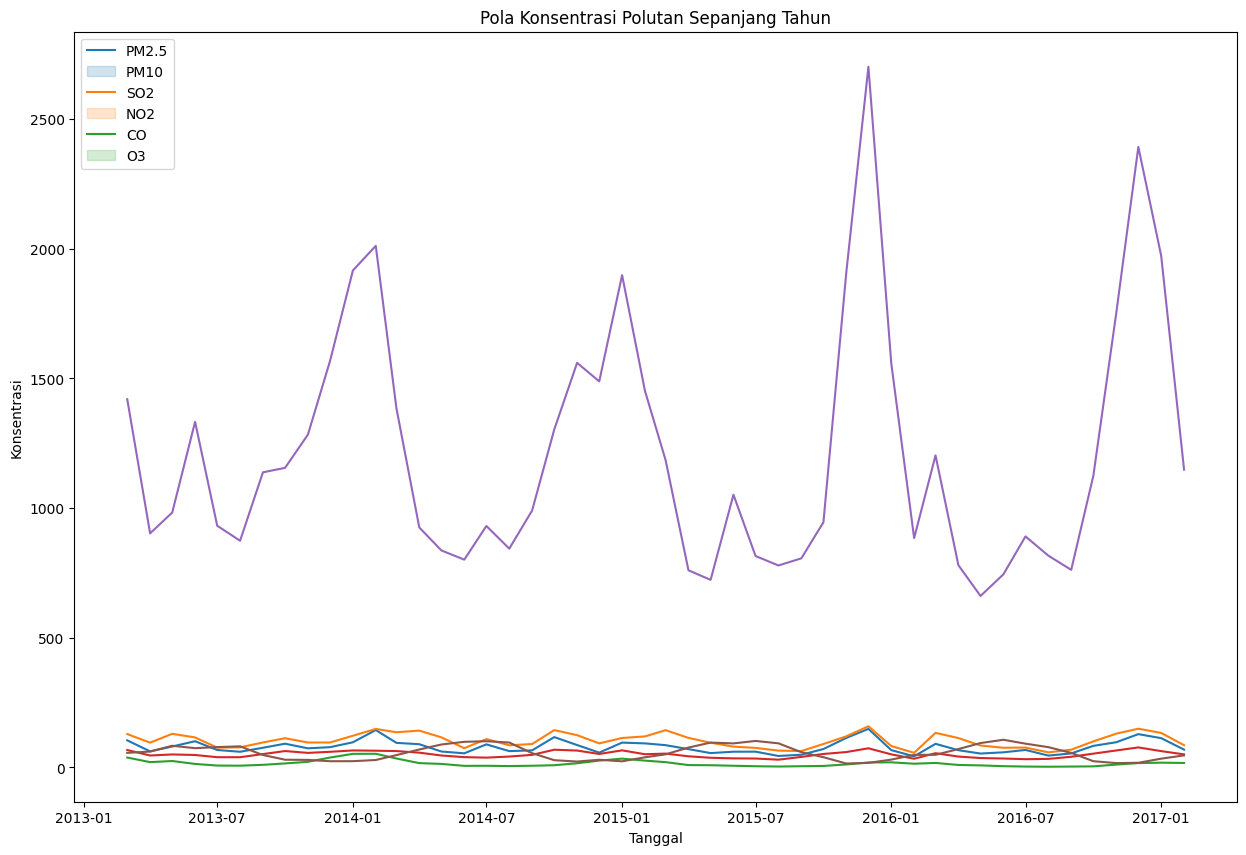

In [8]:
# Buat plot garis waktu untuk setiap polutan
plt.figure(figsize=(15, 10))
for pollutant in pollutants:
    sns.lineplot(data=monthly_averages, x='date', y=pollutant)
plt.title('Pola Konsentrasi Polutan Sepanjang Tahun')
plt.xlabel('Tanggal')
plt.ylabel('Konsentrasi')
plt.legend(pollutants)
plt.show()


### Pertanyaan 2: Apakah ada korelasi antara suhu (TEMP), tekanan (PRES), titik embun (DEWP), dan hujan (RAIN) dengan konsentrasi polutan?

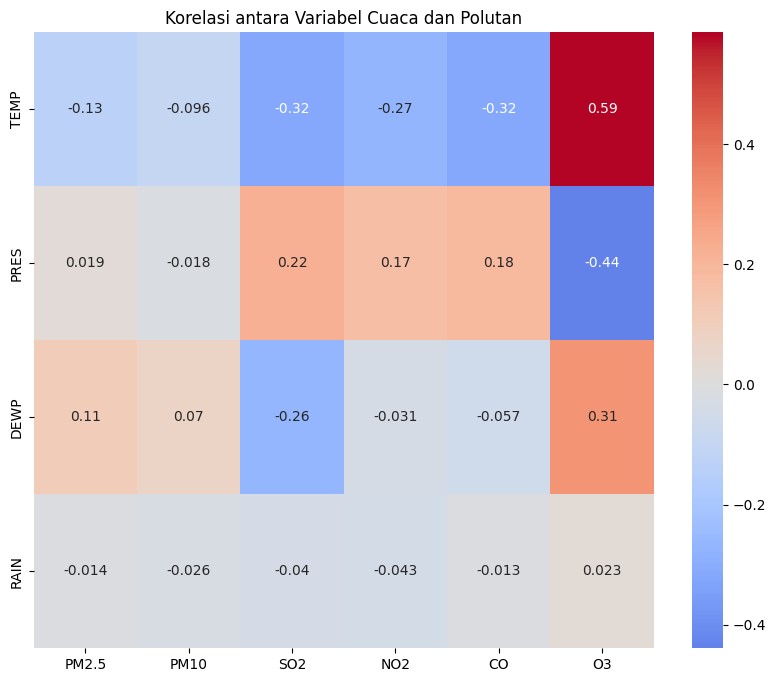

In [9]:
# Buat heatmap korelasi antara variabel cuaca dan polutan
plt.figure(figsize=(10, 8))
sns.heatmap(correlations.loc[weather_vars, pollutant_vars], annot=True, cmap='coolwarm', center=0)
plt.title('Korelasi antara Variabel Cuaca dan Polutan')
plt.show()


## Conclusion

Berikut adalah kesimpulan dari hasil analisis dan visualisasi data:

1. **Pola Konsentrasi Polutan Sepanjang Tahun:**
    
    Dari visualisasi garis waktu yang telah dibuat, tampak bahwa konsentrasi setiap polutan berubah sepanjang tahun. Meskipun ada beberapa fluktuasi, namun secara umum konsentrasi polutan tertinggi sepanjang tahun ada di awal tahun yaitu sekitar bulan Januari dan konsentrasi polutan terendah ada di pertengahan tahun yaitu sekitar bulan Juli.

2. **Korelasi antara Variabel Cuaca dan Polutan:**

    Dari heatmap korelasi yang telah dibuat, tampak bahwa ada beberapa hubungan antara variabel cuaca dan polutan.

    Suhu (TEMP) memiliki korelasi positif dengan ozon (O3), yang berarti bahwa konsentrasi ozon cenderung lebih tinggi saat suhu lebih tinggi. Sebaliknya, suhu memiliki korelasi negatif dengan beberapa polutan lain seperti SO2, NO2, dan CO, yang berarti bahwa konsentrasi polutan ini cenderung lebih rendah saat suhu lebih tinggi. Lalu untuk polutan yang lainnya karena memiliki nilai korelasi yang sangat rendah (mendekati nol), nilai korelasinya terhadap suhu dapat kita abaikan.

    Sedangkan untuk tekanan (PRES), dari heatmap tampak bahwa tekanan memiliki korelasi positif dengan SO2, NO2 dan CO. Hal ini berarti bahwa konsesntrasi polutan cenderung lebih tinggi saat tekanan lebih tinggi. Sebaliknya, tekanan memiliki korelasi negatif dengan O3, yang berarti bahwa konsentrasi ozon cenderung lebih rendah saat tekanan lebih tinggi. Lalu untuk polutan yang lainnya karena memiliki nilai korelasi yang sangat rendah (mendekati nol), nilai korelasinya terhadap tekanan dapat kita abaikan.

    Titik embun (DEWP) memiliki korelasi positif dengan O3, ini berarti bahwa konsentrasi O3 cenderung lebih tinggi saat titik embun lebih tinggi. Namun, titik embun memiliki korelasi negatif dengan SO2 yang berarti bahwa konsentrasi polutan ini cenderung lebih rendah saat titik embun lebih tinggi. Lalu untuk polutan yang lainnya karena memiliki nilai korelasi yang sangat rendah (mendekati nol), nilai korelasinya terhadap titik embun dapat kita abaikan.

    Hujan (RAIN) memiliki nilai korelasi yang sangat rendah (mendekati nol) terhadap semua jenis polutan dalam dataset ini. Ini berarti korelasi antara hujan dengan konsentrasi polutan relatif dapat kita abaikan.

    Namun, perlu diingat bahwa korelasi bukan berarti sebab-akibat, dan mungkin ada faktor lain yang mempengaruhi hubungan ini.







In [10]:
df.to_csv("data air quality.csv", index=False)